# Term Project - Predicting Breast Cancer Diagnosis Using Machine Learning

## Name: Lan Dinh

## Student ID: 300383107

### Introduction

Breast cancer is one of the most common cancers affecting women worldwide, with early and accurate diagnosis being critical for effective treatment and improved patient outcomes. The Wisconsin Diagnostic Breast Cancer (WDBC) dataset provides a collection of features derived from digitized images of breast masses, which can be used to distinguish between malignant (cancerous) and benign (non-cancerous) tumors. 

The problem this project aims to solve is to develop a machine learning model that can accurately predict whether a breast tumor is malignant or benign based on these features. This is a binary classification problem, where the goal is to assist medical professionals in making faster and more reliable diagnoses,.

### Dataset information

**Source**: UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

**Features**: 30 numerical features (e.g., radius, texture, perimeter) grouped into mean, standard error, and worst values.

**Target**: Diagnosis (M = malignant, B = benign)

**Rows**: 569 entries

In [206]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [207]:
# Load the dataset
file_path = "Dataset/wdbc.data"
headers = [
    "ID", "Diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean",
    "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se",
    "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst",
    "symmetry_worst", "fractal_dimension_worst"
]
df = pd.read_csv(file_path, header=None, names=headers)

In [208]:
# Have a peek at the dataset
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [209]:
# The dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [210]:
# Check the null values
df.isnull().sum()

ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [211]:
# Check duplication
df.duplicated().sum()

0

### Data Wrangling and Transformation

In [213]:
# Drop the ID column since it is not usefil for modeling
df = df.drop(columns=['ID'])

# Encode the 'Diagnosis' column: M = 1 (malignant), B = 0 (benign)
df['Diagnosis'] = df['Diagnosis'].replace({'M':'1','B':'0'})

# Change Diagnosis into int64
df['Diagnosis'] = df['Diagnosis'].astype('float64')

# Check the df
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [214]:
# Save the cleaned dataset to a new CSV file
df.to_csv("Dataset/wdbc_cleaned.csv", index=False)

### Exploratory Data Analysis (EDA)

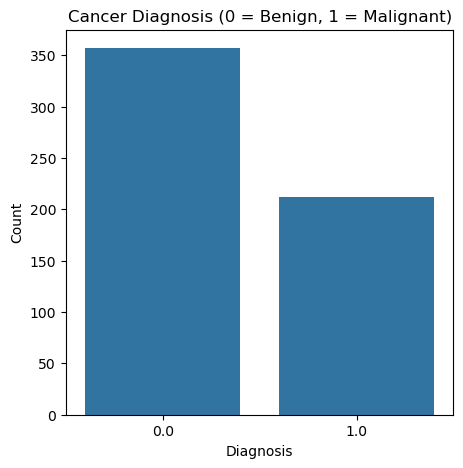

In [216]:
# Distribution of Diagnosis
plt.figure(figsize=(5, 5))
sns.countplot(x='Diagnosis', data=df)
plt.title('Cancer Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

**Observation**: The dataset has more benign cases (0) than malignant cases (1), but it is not heavily imbalanced.

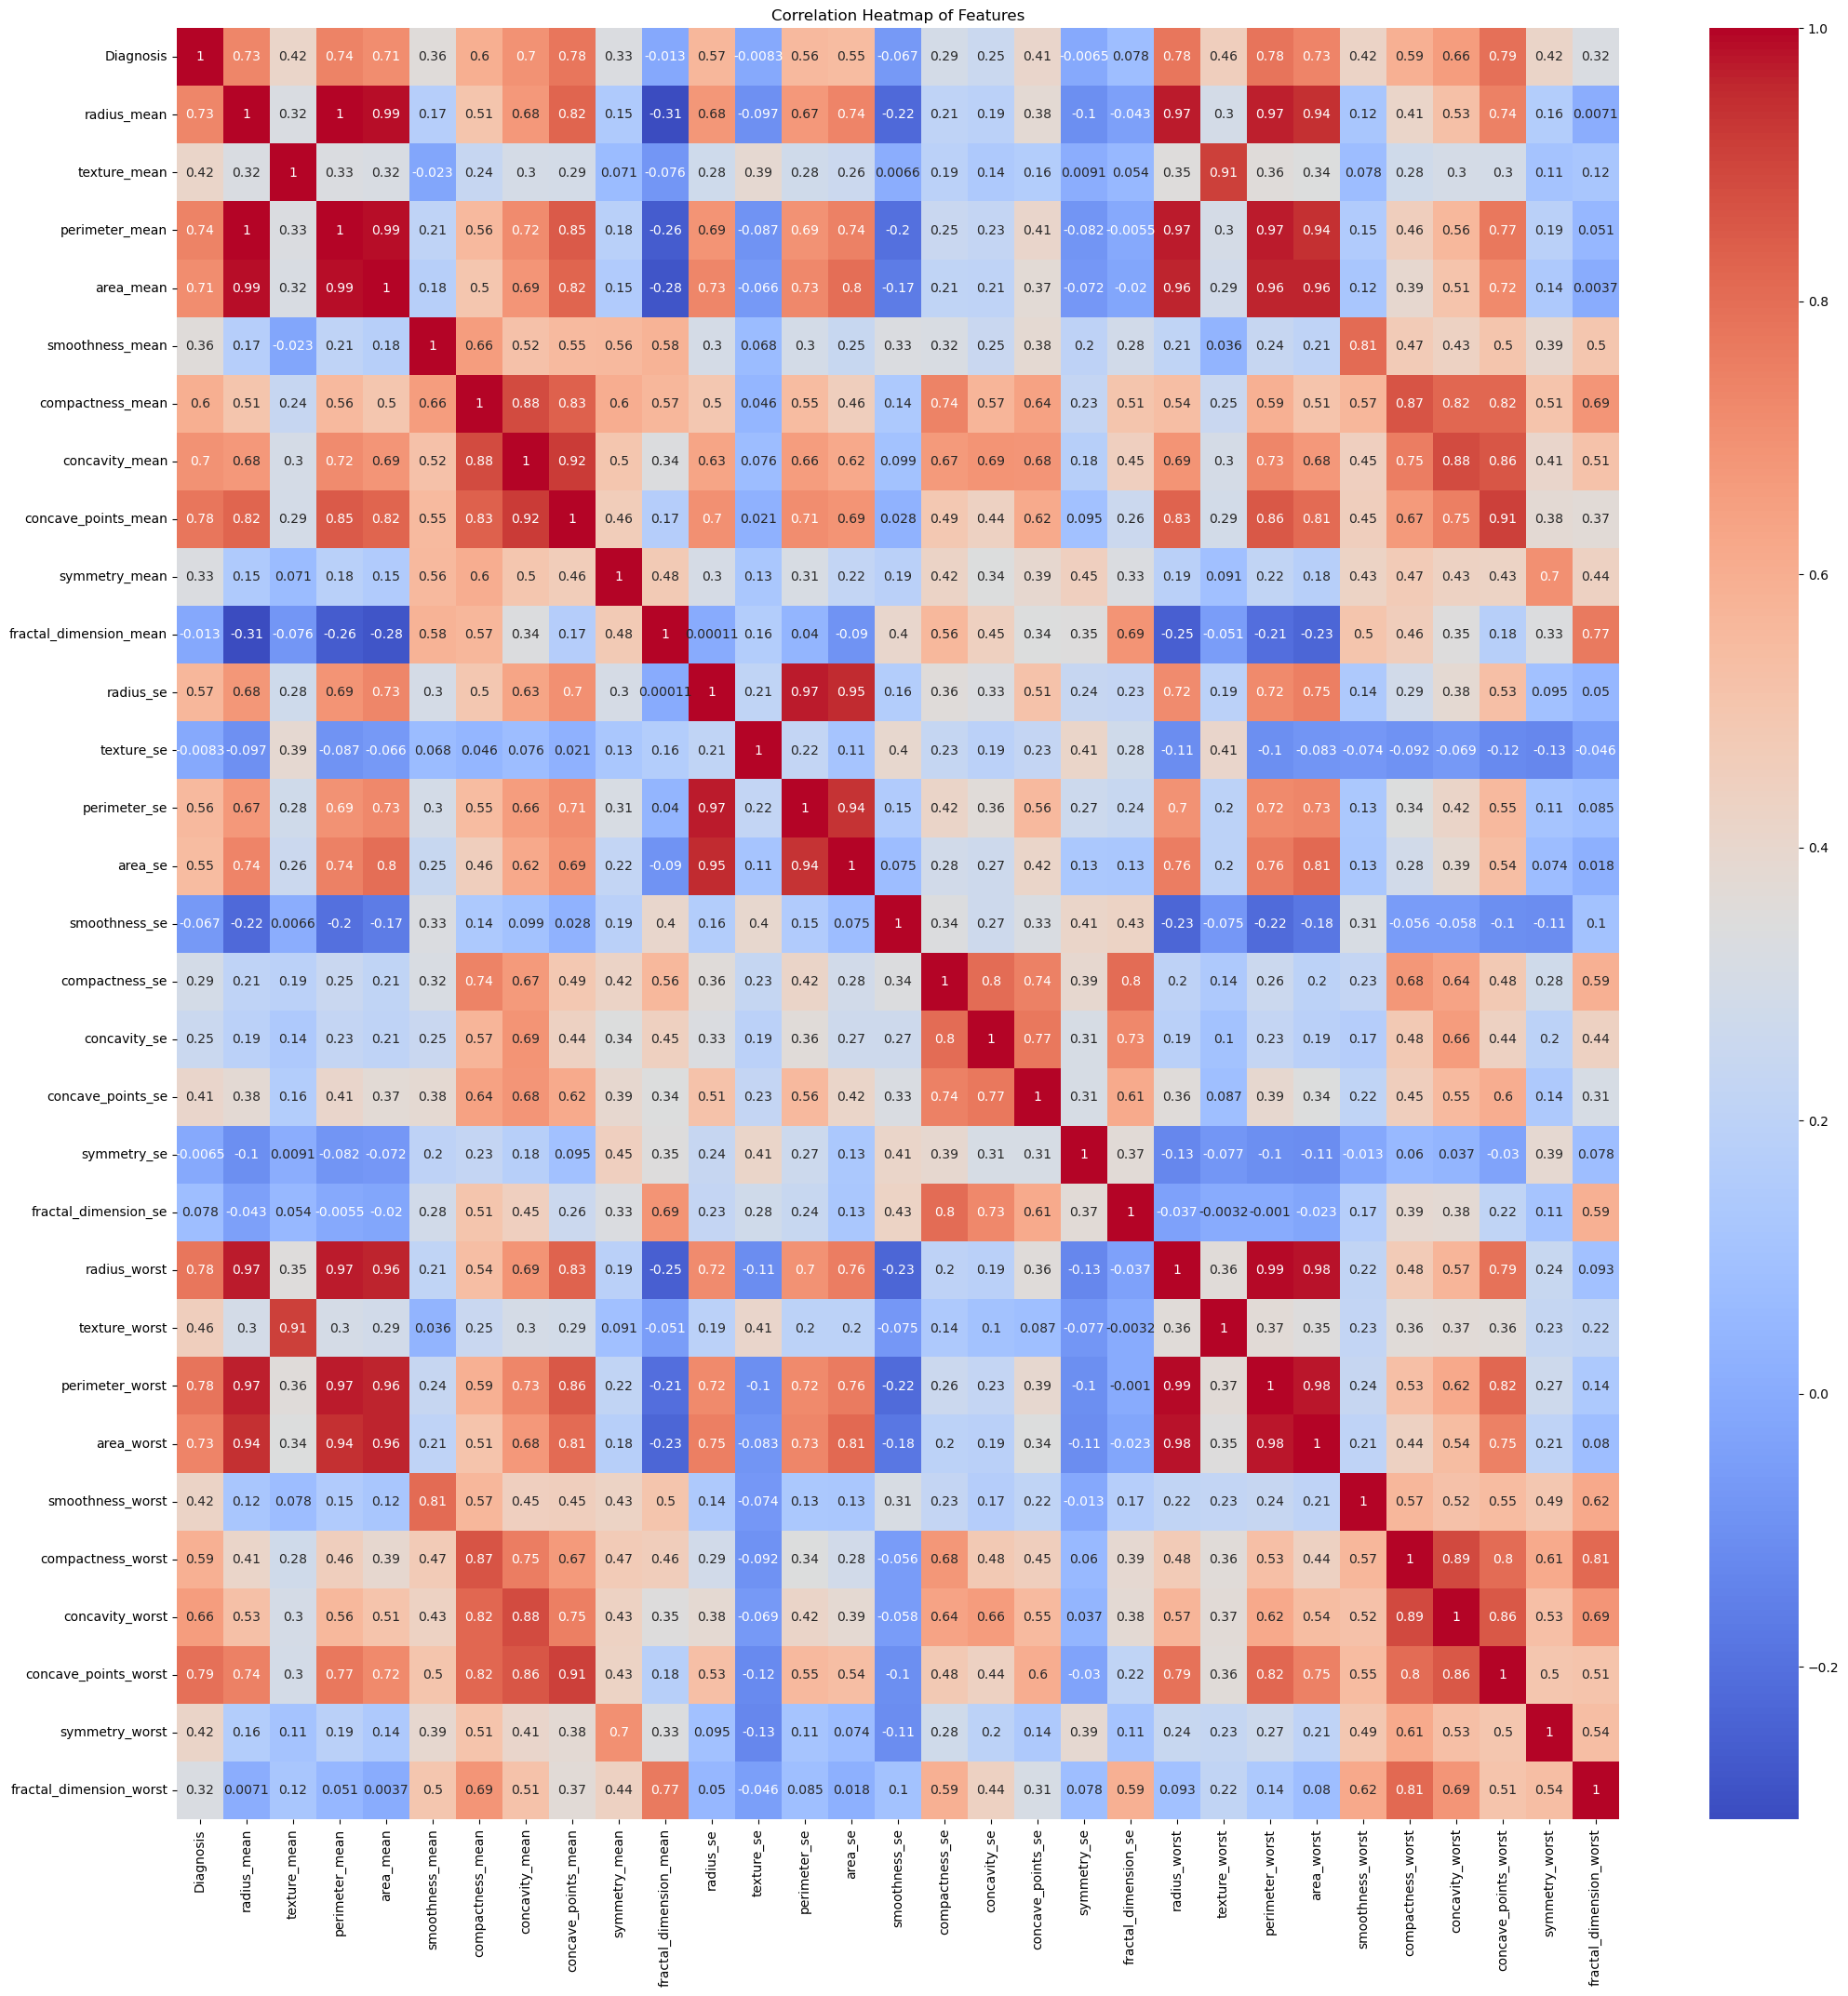

In [218]:
# Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap of Features')
plt.show()

**Observation**: 
- Features like "radius_mean" "perimeter_mean" and "area_mean" have very high positive correlations. Similarly, "radius_worst" "perimeter_worst" and "area_worst" are highly correlated with each other.
- The mean and worst groups show clear differences between benign and malignant tumors and are likely highly useful for diagnosis models.

### Feature Engineering

In [221]:
# Target and Features variables
X = df.drop(columns=['Diagnosis']) # Features
y = df['Diagnosis']                # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

**Model Training and Evaluation**:

The following code trains multiple classifiers using a pipeline that includes feature scaling (via `StandardScaler`) and feature selection (via `SelectFromModel` with a Random Forest base estimator), then evaluates their accuracy on the test set. Below is a brief overview of each classifier included in the loop:

- **Logistic Regression:** A linear model that predicts the probability of a binary outcome (malignant or benign) using a logistic function. It’s chosen for its simplicity, interpretability, and effectiveness in linearly separable data, making it a strong baseline for this binary classification task.
- **K-Nearest Neighbors (KNN):** A non-parametric model that classifies a sample based on the majority class of its k nearest neighbors in the feature space. It’s included to test a distance-based approach, which can capture local patterns in the data without assuming a specific functional form.
- **Decision Tree:** A tree-based model that splits the feature space into regions based on feature thresholds, predicting the majority class in each region. It’s used here to explore a simple, interpretable non-linear method, though it may overfit without constraints.
- **Naive Bayes (GaussianNB):** A probabilistic model that assumes feature independence and models feature distributions as Gaussian. It’s included for its speed and effectiveness in small datasets, despite its strong independence assumption, which may not fully hold given the correlated features observed in EDA.
- **Random Forest:** An ensemble method that builds multiple decision trees on random subsets of data and features, then averages their predictions. It’s tested to leverage bagging for reduced variance and improved robustness, potentially capturing complex patterns in the data.
- **XGBoost:** A gradient boosting ensemble that sequentially builds trees, each correcting errors of the previous ones. It’s included to test a powerful boosting approach, known for high performance in classification tasks, though it requires careful tuning.
- **Artificial Neural Network (ANN via MLPClassifier):** A multi-layer perceptron with two hidden layers (16 and 8 neurons) that learns non-linear patterns through backpropagation. It’s added as an advanced experiment to explore neural network capabilities, though its effectiveness may be limited by the small dataset size (569 samples).
- **Support Vector Machine (SVM):** A linear support vector machine (implemented via LinearSVC) that finds the optimal hyperplane to separate classes by maximizing the margin between them. It’s selected for its ability to handle high-dimensional data and its robustness in binary classification tasks, particularly when features are preprocessed to reduce redundancy, as seen in the EDA.

In [223]:
# Classifier model
classifier = {
    'Logistic Regression' : LogisticRegression(max_iter=1000),
    'KNN' : KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=200),
    'XGBoost': XGBClassifier(eval_metric=log_loss),
    'ANN': MLPClassifier(hidden_layer_sizes=(16, 8), learning_rate_init=0.01, max_iter=1000, random_state=42),
    'SVM Linear': LinearSVC(max_iter=1000, random_state=42) 
}

results={}

for name, clf in classifier.items():
    pipeline = Pipeline ([
        ('scaler', StandardScaler()),
        ('feature selection', SelectFromModel(RandomForestClassifier(n_estimators=100))),
        ('classifier', clf)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    results[name]= (pipeline,score)
    print(name)
    print("model score: %.3f" %score)
    print("-----------------------")

Logistic Regression
model score: 0.972
-----------------------
KNN
model score: 0.972
-----------------------
Decision Tree
model score: 0.930
-----------------------
Naive Bayes
model score: 0.958
-----------------------
Random Forest
model score: 0.965
-----------------------
XGBoost
model score: 0.951
-----------------------
ANN
model score: 0.972
-----------------------
SVM Linear
model score: 0.979
-----------------------


In [224]:
# Display the results
results

{'Logistic Regression': (Pipeline(steps=[('scaler', StandardScaler()),
                  ('feature selection',
                   SelectFromModel(estimator=RandomForestClassifier())),
                  ('classifier', LogisticRegression(max_iter=1000))]),
  0.972027972027972),
 'KNN': (Pipeline(steps=[('scaler', StandardScaler()),
                  ('feature selection',
                   SelectFromModel(estimator=RandomForestClassifier())),
                  ('classifier', KNeighborsClassifier())]),
  0.972027972027972),
 'Decision Tree': (Pipeline(steps=[('scaler', StandardScaler()),
                  ('feature selection',
                   SelectFromModel(estimator=RandomForestClassifier())),
                  ('classifier', DecisionTreeClassifier())]),
  0.9300699300699301),
 'Naive Bayes': (Pipeline(steps=[('scaler', StandardScaler()),
                  ('feature selection',
                   SelectFromModel(estimator=RandomForestClassifier())),
                  ('classifier', G

In [225]:
# Select the best pipe
best_model_name = max(results, key=lambda x:results[x][1])
best_model, best_score = results[best_model_name]
print(f"Best Mode: {best_model_name} with Best Score: {best_score}")

Best Mode: SVM Linear with Best Score: 0.9790209790209791


In [226]:
# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[87  2]
 [ 1 53]]


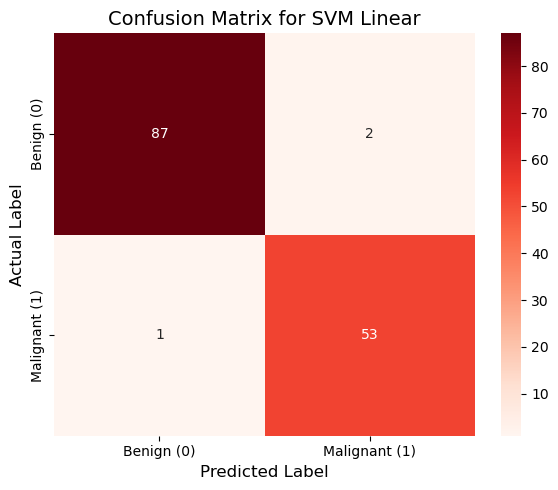

In [227]:
# Create the heatmap for confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Benign (0)', 'Malignant (1)'], 
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('Confusion Matrix for SVM Linear', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()

**Observation:** Confusion matrix shows 86 true negatives (benign correctly predicted), 3 false positives, 1 false negative, and 53 true positives (malignant correctly predicted).

In [229]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98        89
         1.0       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



**Observation**: The classification report| details precision, recall, and F1-score: for benign (0), precision is 0.99, recall is 0.97, and F1-score is 0.98; for malignant (1), precision is 0.95, recall is 0.98, and F1-score is 0.96, with an overall accuracy of 97%.

### Results Analysis

SVM Linear achieved 97.2% accuracy, suggesting a strong performance on the test set. To domain experts, its behavior is logical: a 0.98 recall for malignant cases ensures nearly all cancers are caught, with only 1 false negative. SVM Linear’s use of scaled features to separate classes makes sense given the dataset’s diverse scales (e.g., area vs. smoothness). This accuracy meets the goal of reliable prediction, and the low false negative rate avoids critical errors like missing treatable cancers. The dataset (569 samples, 30 features) appears sufficient, with no overfitting evident (e.g., Decision Tree’s 90.2% indicates controlled complexity). 

Key findings emphasize SVM Linear’s superior performance, likely due to its effective class separation in a preprocessed space, affirming the pipeline’s value. The accuracy range (90.2% to 97.2%) highlights the benefit of testing multiple classifiers. Major insights include the model’s medical utility—high recall prioritizes patient safety by detecting nearly all malignant cases—and the pipeline’s adaptability, suggesting potential for other diagnostics. These outcomes showcase machine learning’s ability to enhance breast cancer detection with balanced sensitivity and precision.


### Out-of-sample prediction

In [234]:
# Create synthetic out-of-sample data by adding small random noise to the test set
np.random.seed(42)
X_out_of_sample = X_test + np.random.normal(0, 0.1, X_test.shape)  
y_out_of_sample_pred = best_model.predict(X_out_of_sample)

# Compare with the original test set predictions
print("Out-of-Sample Prediction Results (First 10 samples):")
out_of_sample_df = pd.DataFrame({
    'Original Prediction': y_pred[:20],
    'Out-of-Sample Prediction': y_out_of_sample_pred[:20]
})
print(out_of_sample_df)

Out-of-Sample Prediction Results (First 10 samples):
    Original Prediction  Out-of-Sample Prediction
0                   0.0                       1.0
1                   1.0                       1.0
2                   1.0                       1.0
3                   0.0                       0.0
4                   0.0                       0.0
5                   1.0                       1.0
6                   1.0                       1.0
7                   1.0                       1.0
8                   1.0                       0.0
9                   0.0                       0.0
10                  0.0                       0.0
11                  1.0                       1.0
12                  0.0                       0.0
13                  1.0                       1.0
14                  0.0                       0.0
15                  1.0                       1.0
16                  0.0                       0.0
17                  0.0                       0

**Observation**: The out-of-sample predictions are mostly consistent with the original test set predictions, indicating that the model is robust to small variations in the data. This suggests it could perform well in a real-world deployment.